In [1]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

In [2]:
Lx, Ly = 5.0, 5.0
nx, ny = 192, 192
dx, dy = Lx / (nx - 1), Ly / (ny - 1)

Du, Dv = 0.00016, 0.00008
F, k = 0.035, 0.065

t = 8000.0
dt = 9.0 * dx**2 / (40.0 * max(Du, Dv))
nt = int(t / dt)

In [3]:
import urllib.request

# Download and read the data file.
url = ('https://github.com/numerical-mooc/numerical-mooc/blob/master/'
       'lessons/04_spreadout/data/uvinitial.npz?raw=true')
filepath = 'uvinitial.npz'
urllib.request.urlretrieve(url, filepath);

In [4]:
# Read the initial fields from the file.
uvinitial = numpy.load(filepath)
u0, v0 = uvinitial['U'], uvinitial['V']

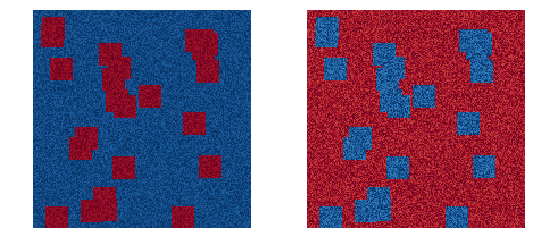

In [5]:
# Plot the initial fields.
fig, ax = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(u0, cmap=cm.RdBu)
ax[0].axis('off')
ax[1].imshow(v0, cmap=cm.RdBu)
ax[1].axis('off');

In [6]:
def ftcs(u0, v0, nt, dt, dx, dy, Du, Dv, F, k):
    u = u0.copy()
    v = v0.copy()
    for n in range(nt):
        u[1:-1, 1:-1] = (u[1:-1, 1:-1] +
                         Du * dt * (u[1:-1, 2:] - 2.0 * u[1:-1, 1:-1] + u[1:-1, :-2]) / (dx**2) +
                         Du * dt * (u[2:, 1:-1] - 2.0 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / (dy**2) -
                         dt * u[1:-1, 1:-1] * (v[1:-1, 1:-1]**2) + F * (1 - u[1:-1, 1:-1]) * dt)
        v[1:-1, 1:-1] = (v[1:-1, 1:-1] +
                         Dv * dt * (v[1:-1, 2:] - 2.0 * v[1:-1, 1:-1] + v[1:-1, :-2]) / (dx**2) +
                         Dv * dt * (v[2:, 1:-1] - 2.0 * v[1:-1, 1:-1] + v[:-2, 1:-1]) / (dy**2) +
                         dt * u[1:-1, 1:-1] * (v[1:-1, 1:-1]**2) - (F + k) * v[1:-1, 1:-1] * dt)
        u[0, :] = u[1, :]
        u[:, 0] = u[:, 1]
        v[0, :] = v[1, :]
        v[:, 0] = v[:, 1]
        u[-1, :] = u[-2, :]
        u[:, -1] = u[:, -2]
        v[-1, :] = v[-2, :]
        v[:, -1] = v[:, -2]
    return u, v

In [7]:
u, v = ftcs(u0, v0, nt, dt, dx, dy, Du, Dv, F, k)

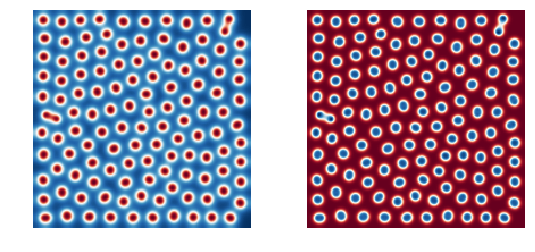

In [8]:
fig, ax = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(u, cmap=cm.RdBu)
ax[0].axis('off')
ax[1].imshow(v, cmap=cm.RdBu)
ax[1].axis('off');

In [9]:
u[100,::40]

array([0.9356651 , 0.83193481, 0.49415938, 0.82522773, 0.88707914])